<a href="https://colab.research.google.com/github/gabrielrflopes/Health_Insurance_Prediction/blob/main/PROJETO_AutoML_aplicado_%C3%A0_previs%C3%A3o_de_custo_de_seguro_de_vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center>
<img src="https://raw.githubusercontent.com/gabrielrflopes/Health_Insurance_Prediction/main/health_insurance_cover.png" width="100%"></p>

## Introdução

No cenário complexo da saúde atual, o impacto dos custos de seguros de saúde nas decisões individuais não pode ser subestimado. Como revelado por estudos recentes, quase metade dos adultos nos Estados Unidos luta com o desafio de arcar com as despesas de cuidados médicos.

> Uma parcela significativa da população, aproximadamente quatro em cada dez adultos, já se viu diante da difícil escolha de adiar ou renunciar a cuidados médicos essenciais devido a restrições financeiras.

Além disso, o peso dos custos de saúde se estende até mesmo para aqueles com seguro.

Mesmo tendo cobertura, uma fração considerável de adultos segurados se preocupa em pagar suas mensalidades e dedutíveis mensais. A apreensão em torno da acessibilidade das despesas de saúde é palpável, afetando um amplo espectro de indivíduos e famílias.

O estudo de 2022 ([KFF Report](https://www.kff.org/health-costs/issue-brief/americans-challenges-with-health-care-costs/)) mostra que adultos sem seguro, indivíduos negros, hispânicos e aqueles com rendas mais baixas enfrentam dificuldades ampliadas em acessar cuidados médicos necessários e são mais propensos a acumular dívidas relacionadas à saúde.

Essas dívidas, oriundas de contas médicas e odontológicas, são uma preocupação generalizada para muitos americanos. Com cerca de quatro em cada dez adultos carregando tais dívidas, as implicações ecoam em sua estabilidade financeira e bem-estar geral.

### Relevância

Diante desses desafios, a emergência de modelos de aprendizado de máquina oferece uma esperança tanto para os indivíduos quanto para a indústria de saúde como um todo.

Ao aproveitar o poder da análise de dados e algoritmos preditivos, esses modelos podem oferecer _insights_ sobre os potenciais encargos financeiros associados aos serviços de saúde.

Esse tipo de inovação permite que formuladores de políticas e provedores de saúde criem soluções que mitiguem os efeitos adversos dos altos custos dos planos.

Além disso, o potencial de modelos capazes de prever os custos de seguros de saúde está associado à possibilidade de tornar os cuidados médicos mais acessíveis. Armados com o conhecimento sobre os custos, pessoas poderão tomar decisões informadas à respeito dos planos, deixando de lado o dilema de adiar os tratamentos necessários ou arriscar-se com dívidas exorbitantes.

### Objetivos

Os objetivos deste projeto consistem na análise exploratória  e visualização de dados, visando conhecer as circunstâncias e fatores que influenciam no aumento ou diminuição do custo dos seguros de saúde. Para isso, serão analisados dados demográficos e relacionados a estilos de vida, como o hábito do cigarro e obesidade. A partir disto, serão construídos os modelos de regressão para prever o valor anual do plano de saúde para determinado indivíduo.

A estrutura do projeto consiste em:

- Realizar uma **análise exploratória dos dados**, com visualização de padrões e tendências;
- Aplicar **_feature engineering_** para aumentar o poder preditivo dos modelos e ampliar a consciência situacional sobre o problema;
- **Processamento dos dados** para aplicação nos modelos de _machine learning_;
- Aplicar técnicas de **AutoML** para montar modelos de _baseline_, comparar as performances, criar **pipelines de processamento**, ajustar os dados e realizar previsões;
- **Avaliar as métricas de desempenho** dos modelos mais promissores e realizar previsões em novos dados;
- Escolher o modelo com o menor erro e salvá-lo para uso posterior em dados inéditos.

Em suma, neste projeto iremos utilizar o **AutoML** baseado no **PyCaret** para criar modelos de regressão e aplicar as técnicas de otimização de desempenho, até termos, ao final, um modelo com a melhor performance na previsão de custos de seguros de saúde.

## Bibliotecas

Para este projeto, iremos utilizar:

- **Análise exploratória dos dados**: Pandas e Numpy
- **Visualização dos dados**: Matplotlib e Seaborn
- **Machine Learning**: Scikit-learn
- **AutoML**: PyCaret

In [ ]:
# Bibliotecas-padrão de análise e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns

# Estilo dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
# Instalar as dependências do PyCaret no Colab
!pip install  pycaret -q

# Métodos de AutoML para regressão
from pycaret.regression import *

## Importando o Conjunto de Dados

In [ ]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/Health_Insurance_Prediction/main/Dataset/insurance.csv'

df = pd.read_csv(data_path)

#### Visão geral dos dados

Vamos visualizar as primeiras e últimas entradas do _dataset_, para podermos ter uma melhor noção de como os dados estão distribuídos.

In [ ]:
# Visualizar as primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Vemos que o conjunto de dados é composto de 4 variáveis numéricas, sendo duas do tipo _float_ (`bmi`, `charges`) e duas (`age`, `children`) do tipo _int_. O restante das variáveis são categóricas. Os dados em cada coluna são também coerentes com o conteúdo descrito em seus nomes.

In [ ]:
# Visualizar as últimas entradas
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


- **Dimensões do _dataset_**

In [ ]:
# Dimensões do dataset
print('Dimensões do Dataset',
      f'\nEntradas:\t {df.shape[0]}',
      f'\nVariáveis:\t {df.shape[1]}')

Dimensões do Dataset 
Entradas:	 1338 
Variáveis:	 7


Trata-se, portanto, de um _dataset_ com mais de 1000 entradas, mas não necessariamente grande, com muitas variáveis.

#### Dicionário de Variáveis

Abaixo, a tabela com as variáveis contidas no _dataset_, juntamente de suas respectivas descrições.

| **Variáveis** |         **Descrição**        |
|:-------------:|:----------------------------:|
| age           | Idade do cliente             |
| sex           | Sexo do cliente              |
| bmi           | Índice de Massa Corporal     |
| children      | Quantidade de filhos         |
| smoker        | Se a pessoa é ou não fumante |
| region        | Região onde reside o cliente |
| charges       | Cobranças                    |

Basicamente, a previsão do custo para seguro de vida irá depender de dados demográficos, como **idade, sexo, número de filhos, região e cobranças**, bem como de dados sobre a saúde e estilo de vida do cliente, como o **índice de massa corporal e se o cliente é fumante ou não**.

## 1. Análise Exploratória dos Dados

#### 1.1 Tipos, Valores Ausentes e Valores Únicos

Vamos visualizar algumas informações sobre o conjunto de dados, como a presença de valores ausentes e os tipos de cada variável. Através da análise dos tipos, vemos se há concordância entre o tipo declarado e os dados em si.

In [ ]:
# Informações sobre valores ausentes e tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> Note que o _dataset_ não possui valores ausentes para serem substituídos ou excluídos. Além disso, todas as variáveis se encontram no formato correto.

In [ ]:
print('Valores Únicos por Coluna\n')

df.nunique()

Valores Únicos por Coluna



age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Nota-se que o _dataset_ consiste dos dados de pessoas de 4 regiões distintas, com diferentes faixas etárias e condições de vida, considerando-se hábitos relacionados à saúde, como `bmi` e `smoker`, e à família, como `children`.

Podemos ver que duas variáveis são binárias (`sex` e `smoker`), a primeira descrevendo o sexo do cliente (_male_ ou _female_) e a segunda descrevendo se a pessoa fuma ou não (_yes_ ou _no_). No decorrer do projeto, iremos incluir estes dados em um pipeline para que sejam codificados, de modo a melhorar a interpretação por parte dos modelos.

#### 1.2 Sumário estatístico

O sumário estatístico nos ajudará mostrando como os dados estão distribuídos, se estão enviesados, se há presença de _outliers_, além de apresentar outras informações estatísticas como a média, mediana e quartis, para as variáveis numéricas, moda e frequência, para as variáveis categóricas.


In [ ]:
df.describe().round(1)

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.2,30.7,1.1,13270.4
std,14.0,6.1,1.2,12110.0
min,18.0,16.0,0.0,1121.9
25%,27.0,26.3,0.0,4740.3
50%,39.0,30.4,1.0,9382.0
75%,51.0,34.7,2.0,16639.9
max,64.0,53.1,5.0,63770.4


Analisando o sumário estatístico, podemos constatar que:

- A média de idade é de 39 anos e vai de 18 até 64 anos;
- A média do índice de massa corporal (`bmi`) é de 30,7, que já é considerado obesidade. Provavelmente a maioria dos exemplos corresponde a pessoas com sobrepeso e obesas;
- A média de crianças por paciente é de 1,1, o que mostra que a maioria das pessoas consideradas tem famílias pequenas.
- A média de cobranças é de US\$ 13270,4 e a mediana de US$ 9382,0, em valores anuais. O máximo é de US\$ 63770,4.

In [ ]:
df.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Entre as variáveis categóricas, temos as seguintes informações:

- A maioria das pessoas são do sexo masculino, com um frequência de 676 exemplos;
- A maioria é não-fumante;
- A maioria é da região sudeste dos EUA.

## 2. Feature Engineering

Algumas relações podem ser feitas entre as variáveis que têm o potencial de aumentar a capacidade preditiva dos modelos de custos de seguro de vida, através da correlação entre massa corporal, uso de cigarro e o valor das cobranças.

Espera-se que pessoas fumantes e obesas façam parte de um grupo de maior risco, com mais chances de apresentarem problemas de saúde num determinado intervalo de tempo, se comparado com pessoas não-fumantes e no IMC ideal.

Assim, vamos criar duas novas variáveis: `bmi_class` e `bmi_smoker`. A primeira relaciona o valor do índice de massa corporal às categorias de peso normal, subpeso, sobrepeso e obesidade. A segunda cruza as informações de `bmi_class` com `smoker`, para separar o grupo de pessoas que fumam e são obesas (portanto, com maiores riscos) do restante.

#### 2.1 Variável `bmi_class`

In [ ]:
# Criando uma nova coluna com valor default
df['bmi_class'] = 0

# Definindo os intervalos do índice de massa corporal
df.loc[df['bmi'] < 18.5, 'bmi_class'] = 'underweight'
df.loc[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9), 'bmi_class'] = 'normal'
df.loc[(df['bmi'] > 24.9) & (df['bmi'] <= 29.9), 'bmi_class'] = 'overweight'
df.loc[(df['bmi'] > 29.9), 'bmi_class'] = 'obese'

#### 2.2 Variável `bmi_smoker`

In [ ]:
# Criando uma nova coluna com valor default
df['bmi_smoker'] = 0

df.loc[(df['bmi_class'] == 'obese') & (df['smoker'] == 'yes'), 'bmi_smoker'] = 'obese_smoker'
df.loc[(df['bmi_class'] != 'obese') & (df['smoker'] == 'yes'), 'bmi_smoker'] = 'no_obese_smoker'
df.loc[(df['bmi_class'] == 'obese') & (df['smoker'] == 'no'), 'bmi_smoker'] = 'obese_no_smoker'
df.loc[(df['bmi_class'] != 'obese') & (df['smoker'] == 'no'), 'bmi_smoker'] = 'no_obese_no_smoker'

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class,bmi_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,no_obese_smoker
1,18,male,33.770,1,no,southeast,1725.55230,obese,obese_no_smoker
2,28,male,33.000,3,no,southeast,4449.46200,obese,obese_no_smoker
3,33,male,22.705,0,no,northwest,21984.47061,normal,no_obese_no_smoker
4,32,male,28.880,0,no,northwest,3866.85520,overweight,no_obese_no_smoker


## 3. Visualização dos Dados

Nesta seção, iremos nos dedicar à visualização dos dados, para melhor analisar distribuições, buscar correlações e criar intuições mais apuradas sobre o problema. Iremos buscar padrões nos dados que podem ser úteis ao criar os modelos e direcionar os dados aos pipelines de processamento.

#### 3.1 Gênero

Primeiramente, queremos checar como se distribuem os gêneros na amostra.

In [ ]:
sex_count = df['sex'].value_counts()

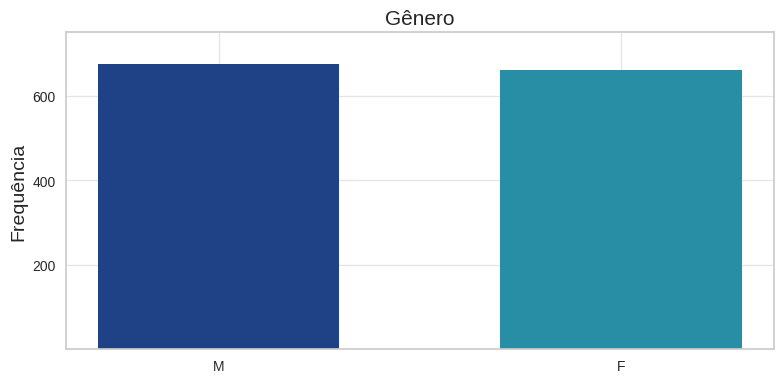

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.bar(sex_count.index,
       sex_count,
       color = ['#1f4287', '#278ea5'],
       width = .6)

ax.set_yticks(ticks = [200, 400, 600, 800])
ax.set_title('Gênero', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_ylim(0, 750)
ax.set_xticks(ticks = [0, 1], labels = ['M', 'F'])
ax.grid(alpha = .5)

fig.savefig('sex.jpg')
fig.tight_layout()
fig.show()

- O conjunto de dados é bem balanceado entre a quantidade de homens e mulheres, havendo uma leve prevalência dos homens na amostra.

#### 3.2 Quantidade de filhos

A quantidade de filhos e dependentes pode ser um fator que aumenta o custo do seguro de saúde, uma vez que a pessoa busca um plano que cubra toda família. Vamos analisar a quantidade de filhos das pessoas nessa amostra, para ver o quanto esse fator irá influenciar nas previsões.

In [ ]:
child_count = df['children'].value_counts()

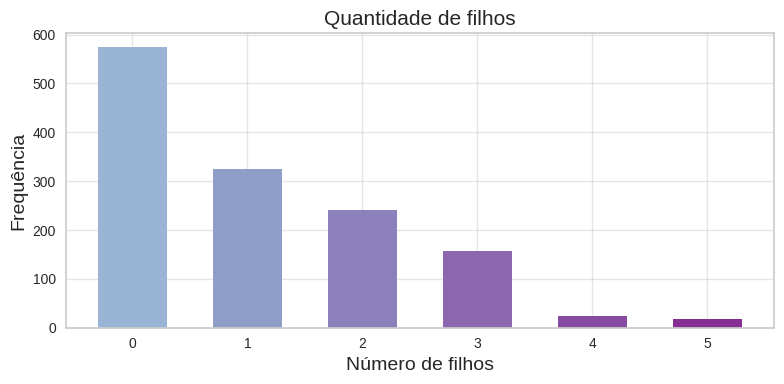

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = cm.BuPu(np.linspace(.4, .8, len(child_count)))

ax.bar(child_count.index,
       child_count,
       color = colors,
       width = .6)

ax.set_title('Quantidade de filhos', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Número de filhos', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('children.jpg')
fig.tight_layout()
fig.show()

- Como foi possível constatar no sumário estatístico, em que a média de filhos é de 1,1, aqui vemos que grande parte das pessoas na amostra sequer possuem dependentes. Dentre os que tem filhos, a maioria possui 1 criança.

#### 3.3 Fumantes por gênero

O cigarro é um fator de risco que tende a aumentar os custos de seguro de saúde. Vamos visualizar como se distribui o hábito de fumar entre os homens e mulheres da amostra.

In [ ]:
smoker_sex = df.groupby(['sex', 'smoker']).size().unstack()

smoker_sex

smoker,no,yes
sex,,
female,547,115
male,517,159


No código acima, criei um agrupamento pelas variáveis `sex` e `smoker`, e com o método `.size()` computei o tamanho de cada grupo. O método `.unstack()` faz um _pivot_ do índice mais interno do agrupamento, colocando-o como sendo o índice das colunas e criando, assim, um novo DataFrame. No caso, `smoker` como sendo _no_ ou _yes_. O índice das linhas ficou sendo os sexos.

Em seguida, vamos construir a visualização.

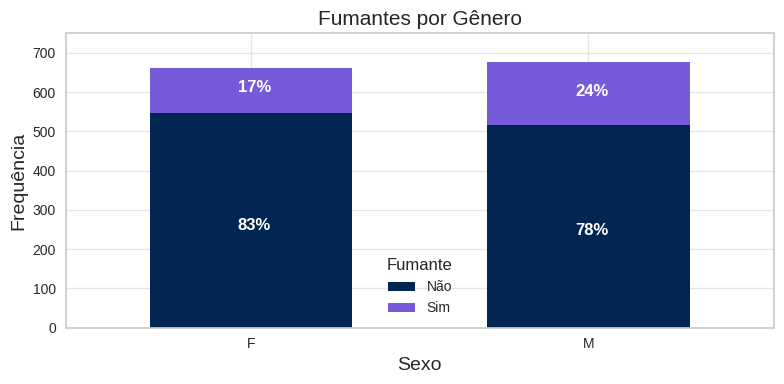

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = ['#002651', '#775ada']

smoker_sex.plot(
                kind = 'bar',
                stacked = True,
                width = .6,
                rot = 0,
                color = colors,
                ax = ax,
                )

ax.set_title('Fumantes por Gênero', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xticks(ticks = [0, 1], labels = ['F', 'M'])
ax.set_xlabel('Sexo', fontsize = 14)
ax.grid(alpha = .5)
ax.set_ylim(0, 750)
ax.legend(labels = ['Não', 'Sim'], title = 'Fumante', loc = 'lower center')

for p in ax.patches:

  f = smoker_sex.T.sum()[0]
  m = smoker_sex.T.sum()[1]

  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()

  if height == (547.0) or (115.0):

    ax.annotate('{:.0f}%'.format(height / f * 100), (x + width/2.3, y + height/2.2), color = 'white', weight = 'bold')

  elif height == (517.0) or (159.0):

    ax.annotate('{:.0f}%'.format(height / m * 100), (x + width/2.3, y + height/2.2), color = 'white', weight = 'bold')

fig.savefig('smoker_sex.jpg')
fig.tight_layout()
fig.show()

- Nota-se que, entre os homens e mulheres da amostra, a maioria não é fumante, e as proporções de fumantes entre homens e mulheres mostram que esse recorte da amostra também está bem balanceado. Ainda assim, há maior prevalência de fumantes entre os homens, com 24% da amostra masculina. Entre as mulheres, 17% tem o hábito de fumar.

#### 3.4 Categorias de IMC

Como foi feito durante a seção 2.1, o índice de massa corporal (IMC) mede a razão entre peso e altura da pessoa, de modo a determinar se ela está no peso ideal ou não. No sumário estatístico, vimos que a amostra possui uma prevalência de pessoas obesas, e que essa condição normalmente tende a aumentar os custos dos planos de saúde.

Vamos visualizar a distribuição das classes de IMC no conjunto de dados:

In [ ]:
# Gerando a contagem das categorias de cada variável
bmi_smoker_count = df['bmi_smoker'].value_counts()
bmi_class_count = df['bmi_class'].value_counts()

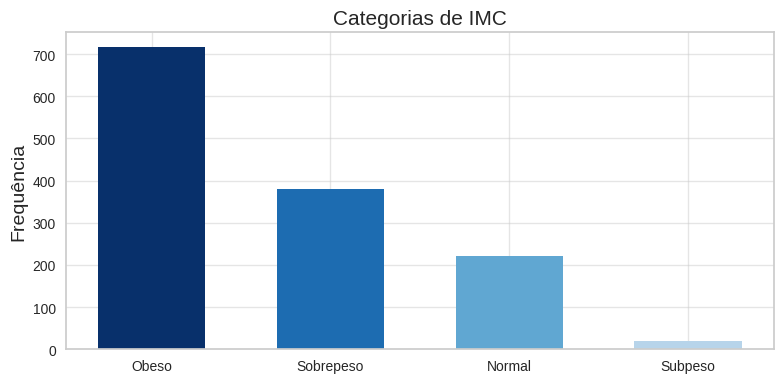

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = cm.Blues_r(np.linspace(0, .7, len(bmi_class_count)))

ax.bar(
        bmi_class_count.index,
        bmi_class_count,
        width = .6,
        color = colors
      )

ax.set_title('Categorias de IMC', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xticks(ticks = [0, 1, 2, 3], labels = ['Obeso', 'Sobrepeso', 'Normal', 'Subpeso'])
ax.grid(alpha = .5)

fig.savefig('bmi_bar.jpg')
fig.tight_layout()
fig.show()

- A maioria das pessoas no conjunto de dados são obesos, cuja pontuação no IMC é maior do que 29,9, conforme visto no sumário estatístico.
- A distribuição segue com pessoas com sobrepeso, peso normal e subpeso, respectivamente, sendo este último uma proporção muito pequena do conjunto total.

#### 3.5 IMC e fumantes

O mesmo procedimento de visualização será realizado para a variável `bmi_smoker`, que cruza os dados de IMC com o fato de a pessoa ser ou não fumante. Como se trata de duas condições agravantes que, combinadas, podem gerar um aumento maior no custo do seguro de saúde, será muito útil visualizar quais categorias tem maior prevalência.

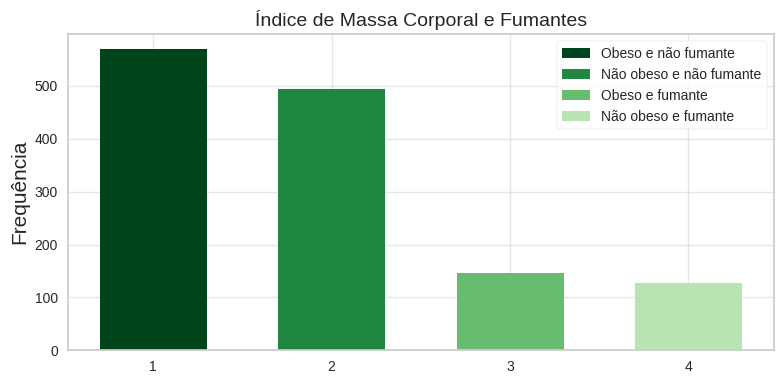

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = cm.Greens_r(np.linspace(0, .7, len(bmi_smoker_count)))

ax.bar(
       bmi_smoker_count.index,
       bmi_smoker_count,
       width = .6,
       color = colors,
       label = ['Obeso e não fumante', 'Não obeso e não fumante',
                'Obeso e fumante', 'Não obeso e fumante']
       )

ax.set_title('Índice de Massa Corporal e Fumantes', fontsize = 14)
ax.set_ylabel('Frequência', fontsize = 15)
ax.set_xticks(ticks = [0, 1, 2, 3], labels = [1, 2, 3, 4])
ax.legend(frameon = True)
ax.grid(alpha = .5)

fig.savefig('bmi_smoker_bar.jpg')
fig.tight_layout()
fig.show()

- Pessoas obesas e não fumantes são predominantes no conjunto, seguido daqueles que não fumam e nem são obesos. Faz sentido, pois como vimos, a maior parcela das pessoas da amostra são obesas e não fumantes.
- Temos particular interesse no grupo de pessoas obesas e fumantes, pois elas combinam dois fatores de risco que tendem a aumentar o custo do seguro de vida.

#### 3.6 Correlação entre as Variáveis

Como queremos prever os custos dos planos de saúde como função de variáveis que dizem respeito aos clientes, iremos visualizar a correlação de cada uma destas com a variável-alvo, `charges`.

A partir dessa análise, será possível construir gráficos de dispersão para aqueles atributos cuja correlação é mais forte com o alvo.

In [ ]:
encoded_df = pd.get_dummies(df)

corr = encoded_df.corr()

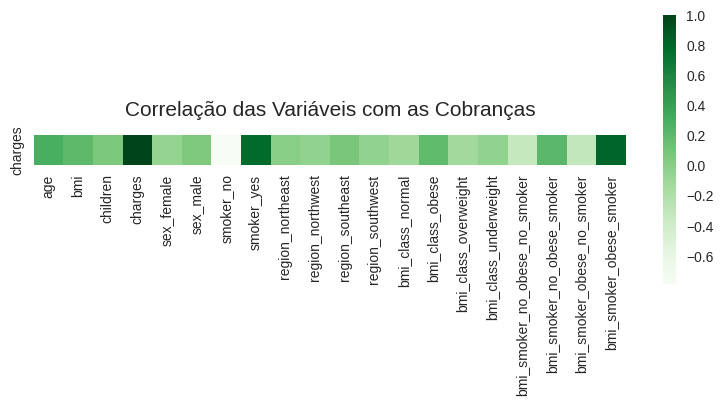

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.heatmap(corr[3:4], square = True, cmap = 'Greens', ax = ax)

ax.set_title('Correlação das Variáveis com as Cobranças', fontsize = 15, pad = 14)

fig.savefig('corr.jpg')
fig.tight_layout()
fig.show()

Da análise das correlações, podemos constatar que:

- A variável `age` tem uma correlação positiva com `charges`, já que quanto mais velho o cliente for, maior o custo do seguro de saúde;
- Existe uma forte correlação positiva entre o cliente ser fumante e a cobrança vir mais alta;
- Existe uma correlação positiva média para clientes obesos;
- Há uma forte correlação positiva para clientes obesos e fumantes;
- Das correlações negativas, nota-se que não ser fumante é determinante para uma baixa nos valores do seguro de saúde.

A seguir, vamos visualizar essas dependências e filtrar de acordo com aquelas que apresentaram correlações mais fortes.

#### 3.7 Distribuição das cobranças por idade

Como acabamos de ver na seção 3.6, a idade é um fator determinante e correlacionado positivamente com as cobranças. Assim, vamos visualizar como ocorre a relação entre a variável `age` e `charges`, buscando por alguma tendência crescente dos dados.

Ainda nessa correlação, iremos filtrar os diferentes fatores que podem influenciar nas cobranças, segmentando melhor os dados.

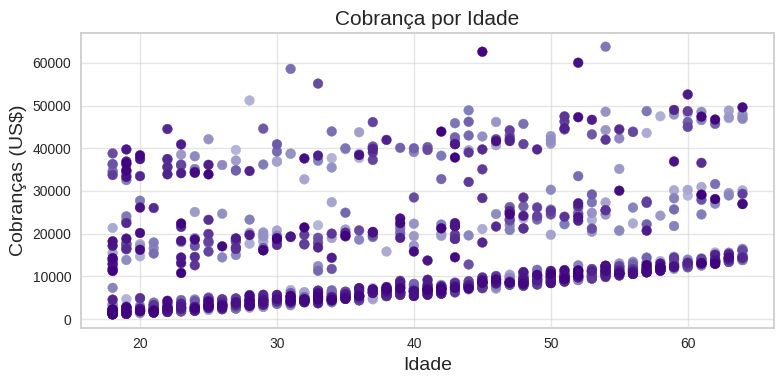

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = cm.Purples(np.linspace(.4, 1, len(df['age'])))

ax.scatter(x = df['age'], y = df['charges'], c = colors)

ax.set_title('Cobrança por Idade', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Cobranças (US$)', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_age.jpg')
fig.tight_layout()
fig.show()

- Note que há uma tendência linear de aumento no valor das cobranças segundo a idade do cliente. É de se esperar que pessoas mais velhas tenham maior necessidade de um seguro de saúde, utilizando-o mais que os jovens.
- Note, também, que existem três grupos distintos de clientes, de modo que para uma mesma faixa etária, existem idosos que pagam menos e outros que pagam mais, por exemplo. Esta diferença no valor das cobranças para uma mesma faixa etária está associada a comorbidades, ou outros fatores de risco que aumentam o valor do seguro de saúde. Assim, é preciso analisar essa tendência segundo a variação de outros atributos, como peso, fumantes, etc.

#### 3.8 Cobranças por Idade - Filtrado pelo Número de Filhos

Vamos seguir a nossa análise filtrando a relação entre idade e cobranças segundo a quantidade de filhos ou dependentes.

In [ ]:
labels, index = np.unique(df['children'], return_inverse = True)

'''
np.unique() encontra os elementos únicos de um array unidimensional.
Retorna os elementos únicos organizados em um array.
return_inverse retorna o array codificado segundo os índices
dos elementos únicos.
'''

'\nnp.unique() encontra os elementos únicos de um array unidimensional.\nRetorna os elementos únicos organizados em um array.\nreturn_inverse retorna o array codificado segundo os índices\ndos elementos únicos.\n'

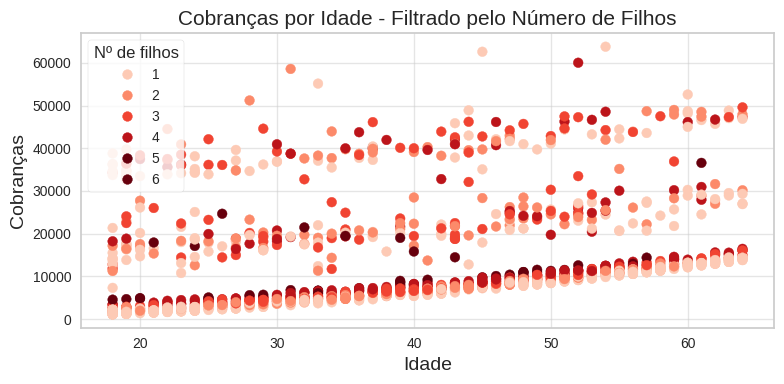

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

plot = ax.scatter(
                  x = df['age'],
                  y = df['charges'],
                  c = index,
                  cmap = 'Reds',
                  norm = Normalize(-1, 4)
                  )

ax.legend(plot.legend_elements()[0],
          labels + 1,
          title = 'Nº de filhos',
          loc = 'upper left',
          frameon = True)

ax.set_title('Cobranças por Idade - Filtrado pelo Número de Filhos', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Cobranças', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_age_children.jpg')
fig.tight_layout()
fig.show()

Analisando as diferenças nas cobranças com respeito à quantidade de filhos, nota-se que este fator não ajuda na segmentação dos clientes.

A amostra consiste de uma maioria que não tem filhos, ou tem no máximo um, e estes estao distribuídos uniformemente na distribuição das cobranças, juntamente com aqueles que tem mais filhos.

Esperava-se que, com mais filhos, haveria uma tendência de maiores cobranças, mas isto não foi observado. Pelo contrário, a maioria que tem mais de 3 filhos se encontram na linha de tendência com menores cobranças.

#### 3.9 Cobranças por Idade - Filtrado por Região

Nesta amostra, temos pessoas que residem em quatro regiões dos EUA. Algumas regiões podem ser mais caras do que outras no quesito plano de saúde. Sendo assim, é válido investigar se as regiões segmentam de alguma forma os clientes, separando-os entre quem paga mais ou menos segundo a região de residência.

In [ ]:
labels, index = np.unique(df['region'], return_inverse = True)

'''
np.unique() encontra os elementos únicos de um array unidimensional.
Retorna os elementos únicos organizados em um array.
return_inverse retorna o array codificado segundo os índices
dos elementos únicos.
'''

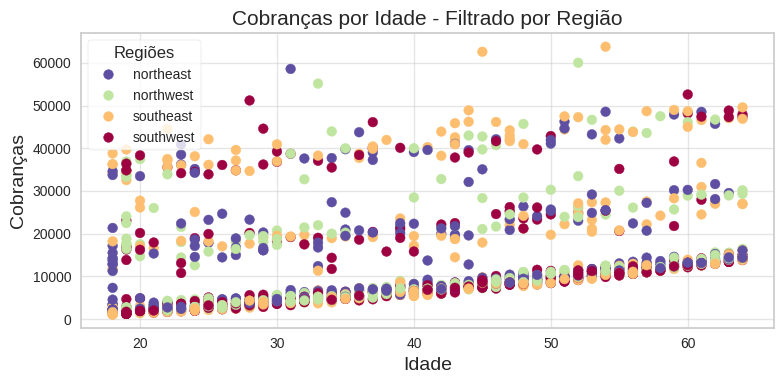

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

plot = ax.scatter(df['age'], df['charges'], c = index, cmap = 'Spectral_r')

ax.legend(plot.legend_elements()[0],
          labels,
          title = 'Regiões',
          loc = 'upper left',
          frameon = True)

ax.set_title('Cobranças por Idade - Filtrado por Região', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Cobranças', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_age_region.jpg')
fig.tight_layout()
fig.show()

Como se pode observar no gráfico de dispersão acima, a região não separa bem os grupos de pessoas que são mais cobradas pelo seguro de saúde. No conjunto, temos uma prevalência da região sudeste (`southeast`) entre os que pagam mais caro, porém ela é a região que ocorre com maior frequência e parece estar distribuída uniformemente através do gráfico de correlação.

#### 3.10 Cobranças por Idade - Filtrado por IMC

Voltamos nossa atenção agora para os fatores que intuitivamente associamos ao aumento das cobranças nos planos de saúde. O IMC é a medida do peso ideal do cliente, e já vimos que está correlacionado positivamente com a variável-alvo.

É importante lembrar que correlação não é causa. Ou seja, não é porque duas coisas possuem uma forte correlação que uma seja a causa da outra. Por isso, é importante investigar se de fato há uma segmentação nas cobranças segundo as variações das classes do IMC.

In [ ]:
labels, index = np.unique(df['bmi_class'], return_inverse = True)

'''
np.unique() encontra os elementos únicos de um array unidimensional.
Retorna os elementos únicos organizados em um array.
return_inverse retorna o array codificado segundo os índices
dos elementos únicos.
'''

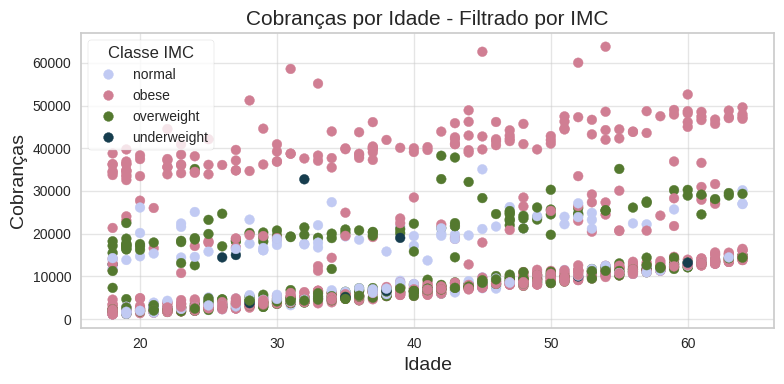

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

plot = ax.scatter(
                  df['age'],
                  df['charges'],
                  c = index,
                  cmap = 'cubehelix_r',
                  norm = Normalize(-1, 4)
                  )

ax.legend(plot.legend_elements()[0],
          labels,
          title = 'Classe IMC',
          frameon = True)

ax.set_title('Cobranças por Idade - Filtrado por IMC', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Cobranças', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_age_bmi_class.jpg')
fig.tight_layout()
fig.show()

Observando a filtragem por IMC, vemos que esse atributo é informativo e divide relativamente bem os dados. Constata-se que a obesidade é um fator que define valores mais altos na cobrança dos seguros de saúde, reforçando a correlação positiva observada anteriormente. Contudo, existem pessoas obesas na linha de tendência com menores custos. Sendo assim, intui-se que não se trata do único fator capaz de segmentar os dados e nos informar sobre os valores dos planos.

De fato, a obesidade é uma comorbidade que eleva o risco da pessoa necessitar do plano de saúde, de modo que ela é cobrada a mais por isso se comparada com pessoas na mesma faixa etária, porém no peso normal.

#### 3.11 Cobranças por Idade - Filtrado por Fumantes

Da mesma forma que o IMC, observou-se uma forte correlação positiva entre o hábito de fumar e cobranças mais caras. Para investigar se, de fato, este é um fator determinante para o aumento dos valores dos planos de saúde, iremos filtrar segundo a variável `smoker`.

In [ ]:
labels, index = np.unique(df['smoker'], return_inverse = True)

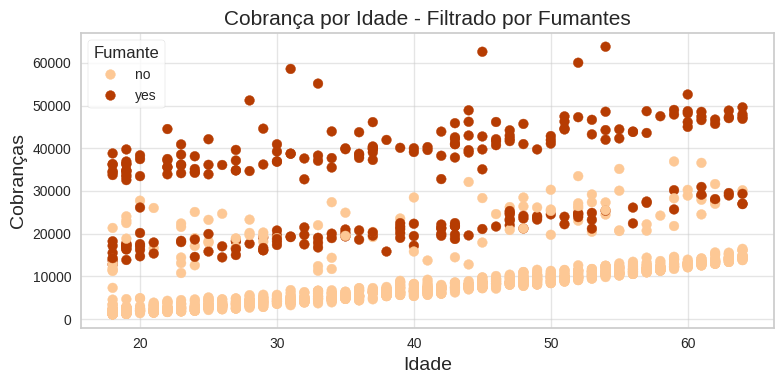

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

plot = ax.scatter(
                  df['age'],
                  df['charges'],
                  c = index,
                  cmap = 'Oranges',
                  norm = Normalize (-.5, 1.3)
                  )

ax.legend(plot.legend_elements()[0],
          labels,
          title = 'Fumante',
          frameon = True)

ax.set_title('Cobrança por Idade - Filtrado por Fumantes', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Cobranças', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_age_smoker.jpg')
fig.tight_layout()
fig.show()

- Filtrando os dados por fumantes, fica evidente que quem tem esse hábito é mais cobrado pelo seguro de saúde. Basicamente todos os exemplos situados na região de cobranças mais altas são fumantes.

- Na região de cobranças intermediárias, nota-se que existem ainda pessoas não-fumantes, mas que a maioria se trata de fumantes.

- Na região de cobranças mais baixas, **não existe nenhum fumante**.

Portanto, a variável `smoker` divide bem os clientes entre grupos que são mais ou menos cobrados, sendo um atributo muito informativo.

#### 3.12 Cobrança por Idade - IMC e Fumantes

Já constatamos que o IMC e o hábito de fumar são dois fatores que diferenciam pessoas que pagam por planos de saúde mais caros. Agora, queremos visualizar a interseção entre as classes do IMC com ser fumante ou não. A variável `bmi_smoker` tem 4 classes que agrupa indivíduos caso sejam obesos ou não, e fumantes ou não. Vamos ver se este atributo consegue definir as diferenças nos custos de seguros de saúde.

In [ ]:
labels, index = np.unique(df['bmi_smoker'], return_inverse = True)

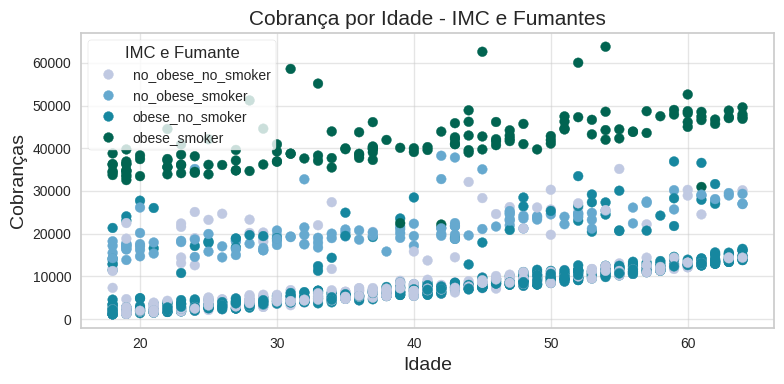

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

plot = ax.scatter(
                  df['age'],
                  df['charges'],
                  c = index,
                  cmap = 'PuBuGn',
                  norm = Normalize(-1.5, 3.5)
                  )

ax.legend(plot.legend_elements()[0],
          labels,
          title = 'IMC e Fumante',
          frameon = True)

ax.set_title('Cobrança por Idade - IMC e Fumantes', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Cobranças', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_age_bmi_smoker.jpg')
fig.tight_layout()
fig.show()

Fica constatado que temos três grupos que influenciam muito no valor cobrado pelo seguro de saúde:

- **Valores mais baixos:** pessoas que não são obesas nem fumantes, e que são obesas, mas não são fumantes. Conclusão: não ser fumante é determinante para ser menos cobrado;
- **Valores intermediários:** Predominância de pessoas não-obesas e fumantes;
- **Valores altos:** Predominância de pessoas obesas e fumantes. Todos nessa faixa são fumantes.

Logo, conclui-se que ser fumante e obeso é fator determinante para o aumento dos custos com seguros de saúde.

#### 3.13 Cobrança por IMC - Filtrado por Fumantes

Ao analisar as correlações, na seção 3.6, vimos que o IMC possui uma forte correlação positiva com as cobranças. Já visualizamos que ele, de fato, é um atributo informativo para definir os grupos de pessoas que pagam mais ou menos.

Agora, vamos visualizar diretamente a dispersão entre `bmi` e `charges`, fitrando os resultados entre fumantes e não-fumantes.

In [ ]:
labels, index = np.unique(df['smoker'], return_inverse = True)

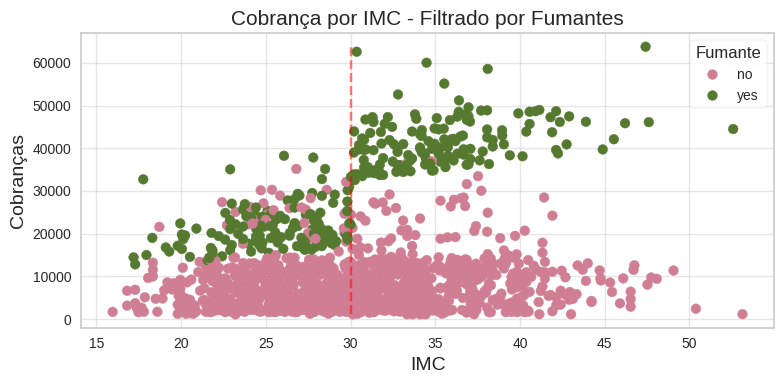

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

plot = ax.scatter(
                  df['bmi'],
                  df['charges'],
                  c = index,
                  cmap = 'cubehelix_r',
                  norm = Normalize(-2, 3)
                  )

ax.vlines(
          x = 30,
          ymin = df['charges'].min(),
          ymax = df['charges'].max(),
          colors = 'red',
          linestyles = 'dashed',
          alpha = .5
          )

ax.legend(plot.legend_elements()[0],
          labels,
          title = 'Fumante',
          frameon = True)

ax.set_title('Cobrança por IMC - Filtrado por Fumantes', fontsize = 15)
ax.set_xlabel('IMC', fontsize = 14)
ax.set_ylabel('Cobranças', fontsize = 14)
ax.grid(alpha = .5)

fig.savefig('charge_imc_smoker.jpg')
fig.tight_layout()
fig.show()

No gráfico acima, a relação entre IMC e as cobranças é disposta, filtrados por quem é fumante ou não. Nota-se, novamente, a diferença nos padrões de cobrança entre os dois grupos. Observando o gráfico, vemos que quem não fuma é cobrado aproximadamente igual, independente do IMC.

Por outro lado, se a pessoa é fumante, ela é naturalmente mais cobrada pelo seguro de saúde, mesmo estando no peso ideal. Porém, por volta do IMC igual a 30, que é o corte que determina a obesidade, existe um aumento drástico nas cobranças, que passa de uma média de 20 mil para 40 mil dólares.


#### 3.14 Boxplot e distribuição de densidade de cobranças para fumantes e não-fumantes

Como vimos essa mudança drástica na média de cobranças entre obesos e não-obesos, fumantes e não-fumantes, vamos analisar a distribuição de densidade das cobranças e algumas estatísticas através do gráfico de boxplot.

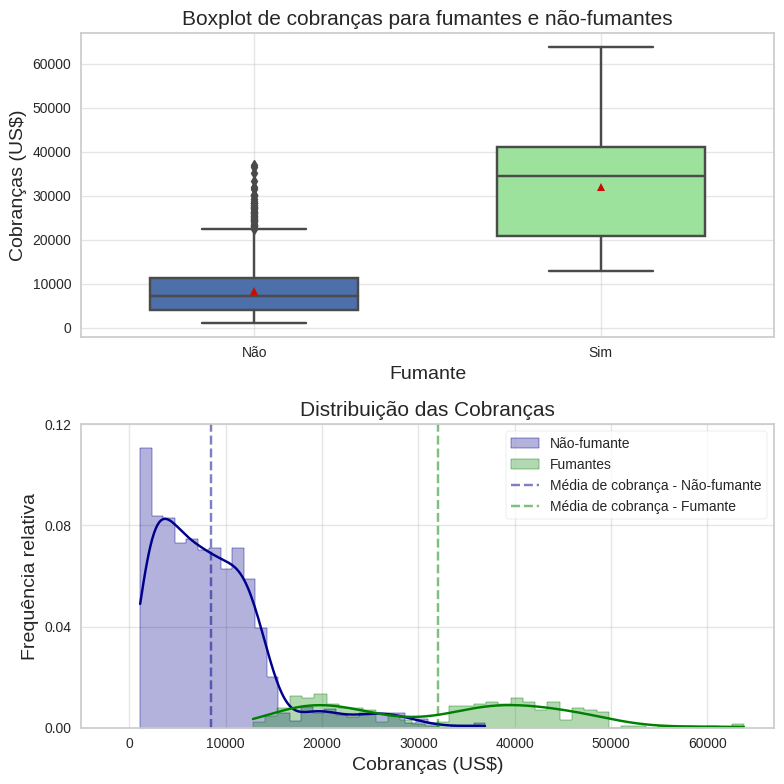

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (8, 8))

'''
Gráfico de Boxplot para visualização da estatística entre smoker e charges
'''

bplt_nsmoker = df['charges'].loc[df['smoker'] == 'no']
bplt_smoker = df['charges'].loc[df['smoker'] == 'yes']

sns.boxplot(
            [bplt_nsmoker, bplt_smoker],
            palette = ['#3d6cb9', 'lightgreen'],
            width = .6,
            showmeans = True,
            ax = ax[0]
            )

ax[0].set_title('Boxplot de cobranças para fumantes e não-fumantes', fontsize = 15)
ax[0].set_xlabel('Fumante', fontsize = 14)
ax[0].set_ylabel('Cobranças (US$)', fontsize = 14)
ax[0].set_xticks(ticks = [0, 1], labels = ['Não', 'Sim'])
ax[0].grid(alpha = .5)

'''
Gráficos de distribuição das cobranças, com cálculo de frequência relativa,
para não fumantes e fumantes.
'''

sns.histplot(
             df['charges'].loc[df['smoker'] == 'no'],
             stat = 'frequency',
             element = 'step',
             kde = True,
             bins = 30,
             alpha = .3,
             color = 'darkblue',
             label = 'Não-fumante',
             ax = ax[1]
             )

sns.histplot(
             df['charges'].loc[df['smoker'] == 'yes'],
             stat = 'frequency',
             element = 'step',
             bins = 40,
             kde = True,
             alpha = .3,
             color = 'green',
             ax = ax[1],
             label = 'Fumantes'
             )

# Linha vertical para indicar a média de cobrança para não-fumantes
ax[1].vlines(
          x = df['charges'].loc[df['smoker'] == 'no'].mean(),
          ymin = 0,
          ymax = .12,
          color = 'darkblue',
          linestyle = 'dashed',
          alpha = .5,
          label = 'Média de cobrança - Não-fumante',
          )

# Linha vertical para indicar a média de cobrança para fumantes
ax[1].vlines(
          x = df['charges'].loc[df['smoker'] == 'yes'].mean(),
          ymin = 0,
          ymax = .12,
          color = 'green',
          linestyle = 'dashed',
          alpha = .5,
          label = 'Média de cobrança - Fumante',
          )

# Manipulação do Axes
ax[1].set_title('Distribuição das Cobranças', fontsize = 15)
ax[1].set_xlabel('Cobranças (US$)', fontsize = 14)
ax[1].set_ylabel('Frequência relativa', fontsize = 14)
ax[1].set_xlim(-5e3, )
ax[1].set_ylim(0, .12)
ax[1].set_yticks(ticks = [0, 0.04, 0.08, 0.12])
ax[1].legend(frameon = True, fancybox = True)
ax[1].grid(alpha = .5)

fig.savefig('box_dist_plot.jpg')
fig.tight_layout()
fig.show()

No **boxplot**, vemos que as estatísticas se diferem muito entre pessoas fumantes e não-fumantes. Para quem não fuma, o intervalo entre quartis fica entre 5 e 12 mil dólares, com uma média abaixo dos 10 mil dólares.

Por outro lado, para os fumantes, as cobranças já começam muito mais altas, de modo que o primeiro quartil dos fumantes corresponde aproximadamente ao valor máximo cobrado para os não-fumantes. O intervalo entre quartis varia de aproximadamente 20 mil dólares até aproximadamente 41 mil dólares.

No **gráfico de distribuição de densidade**, vemos que de fato a média para os fumantes é muito deslocada para as cobranças mais altas, se comparadas com os não-fumantes. Enquanto a média para estes últimos é menor do que 10 mil dólares, para os primeiros ela passa de 30 mil dólares.

Naturalmente, a maioria da amostra não fuma, e por isso a distribuição se concentra com maior frequência em valores menores. Portanto, encerramos a seção de visualização concluindo que existe uma grande diferenciação entre clientes que fumam daqueles que não fumam, no que diz respeito às cobranças realizadas.

> **O fato do cliente ser obeso, fumante, ou reunir os dois fatores, é determinante para prever um plano de saúde mais caro.**

## Preparação dos Dados

#### 4.1 Separação dos Dados

Para iniciar a seção de preparação dos dados para a construção dos modelos de ML, vamos separar os conjunto de treino e teste. Iremos separar 15% do _dataset_ original para o conjunto de teste, que servirá para termos exemplos novos para a avaliação de desempenho do modelo. Desde já realizamos a separação para que se evite o vazamento de dados e, consequentemente, o _overfitting_.

In [ ]:
test_df = df.sample(frac = .15)
train_df = df.drop(test_df.index)

In [ ]:
print('Dimensões dos conjuntos de treino e teste',
      f'\nTreino:\t {train_df.shape}',
      f'\nTeste:\t {test_df.shape}')

Dimensões dos conjuntos de treino e teste 
Treino:	 (1137, 9) 
Teste:	 (201, 9)


#### 4.2 Sobre o PyCaret

O PyCaret é uma biblioteca _low-code_ para _Machine Learning_ automatizado. Sua estrutura e interface intuitiva permite que tarefas de aprendizado supervisionado e não-supervisionado sejam realizadas, sem a necessidade de muitas linhas de código. Ao facilitar o fluxo de trabalho com _Machine Learning_, permitindo a criação de pipelines que vão desde o pré-processamento dos dados até o _deployment_ do modelo, o PyCaret aumenta a produtividade, permitindo ao cientista de dados o foco em questões estratégicas e criativas do desenvolvimento dos modelos.

O PyCaret reúne as principais bibliotecas de _Machine Learning_ do Python, como o `Scikit-learn`, juntamente de algoritmos muito utilizados recentemente, como o `XGBoost` e `LightGBM`. Ele também permite a otimização de hiperparâmetros dos modelos baseados nesses algoritmos, o que economiza uma grande quantidade de tempo, abrindo a possibilidade de maior experimentação por parte do cientista de dados.

Neste projeto, iremos utilizar o AutoML baseado no PyCaret para criar modelos de regressão e aplicar as técnicas de otimização de desempenho, até termos, ao final, um modelo com a melhor performance na previsão de custos de seguro de saúde.

##### 4.2.1 Setup

Vamos configurar o pipeline que será utilizado para o pré-processamento e construção dos modelos de Machine Learning pelo PyCaret. Para isto, utilizaremos a função **`.setup()`**, que automatiza as etapas de processamento, treinamento de modelos, escolha de hiperparâmetros e comparação dos modelos de regressão segundo métricas de desempenho.

Para problemas de regressão a função recebe, necessariamente, o conjunto de dados separado para a construção do modelo, e a variável-alvo. A partir disto, é possível configurar, segundo o critério do cientista de dados, as etapas desde o carregamento até o deploy do modelo. O PyCaret é inclusive capaz de automatizar tarefas de _feature engineering_ e _feature selection_.

In [ ]:
reg = setup(data = train_df,
            target = 'charges',
            train_size = .8,
            numeric_features = ['age', 'bmi', 'children'],
            normalize = True,
            session_id = 100)

,Description,Value
0,Session id,100
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1137, 9)"
4,Transformed data shape,"(1137, 18)"
5,Transformed train set shape,"(909, 18)"
6,Transformed test set shape,"(228, 18)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,5


#### 4.3 Comparar modelos possíveis

Com o ambiente configurado para as tarefas de ML, vamos agora construir diversos modelos de regressão baseados na biblioteca de algoritmos presentes no PyCaret. Vamos ordenar por performances segundo a métrica RMSE (_Root Mean Squared Error_), que mede a discrepância entre o valor previsto e o valor real.

Destes modelos de baseline, iremos escolher os três que melhor ranquearem.

In [ ]:
best_baseline = compare_models(n_select = 3,
                               sort = 'RMSE',
                               round = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2388.592,19786412.007,4381.031,0.855,0.396,0.261,0.722
llar,Lasso Least Angle Regression,2385.550,19787111.993,4381.045,0.855,0.396,0.259,0.648
lasso,Lasso Regression,2385.550,19787244.275,4381.054,0.855,0.396,0.259,0.582
ridge,Ridge Regression,2386.435,19788007.617,4381.209,0.855,0.396,0.260,0.811
lar,Least Angle Regression,2385.599,19789142.926,4381.334,0.855,0.396,0.259,0.738
lr,Linear Regression,2391.368,19833444.223,4385.573,0.854,0.396,0.259,2.213
gbr,Gradient Boosting Regressor,2470.047,20490197.771,4459.264,0.849,0.420,0.282,1.286
huber,Huber Regressor,1877.755,20719169.626,4468.124,0.848,0.411,0.143,0.779
par,Passive Aggressive Regressor,1884.574,20906395.845,4488.453,0.847,0.419,0.143,0.665
lightgbm,Light Gradient Boosting Machine,2782.151,22449141.801,4685.487,0.834,0.503,0.332,1.048


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
print(best_baseline)

[BayesianRidge(), LassoLars(random_state=100), Lasso(random_state=100)]


Iremos trabalhar sobre os modelos **Bayesian Ridge**, **Lasso Least Angle Regression** e **Lasso Regression**.

## 5. Construção dos modelos de regressão com AutoML

#### 5.1 Bayesian Ridge

O modelo **_Bayesian Ridge_** permite um mecanismo natural para superar dados insuficientes ou mal distribuídos, ao formular a regressão linear utilizando distribuições de probabilidade ao invés de estimadores pontuais. Assume-se que o _output_ previsto $ \hat{y} $ é decorrente de alguma distribuição de probabilidade ao invés de ser estimado como um valor único.

Os valores prováveis dos coeficientes são calculados segundo uma distribuição normal, para o caso do Bayesian Ridge.

In [ ]:
br = create_model('br',
                  fold = 10,
                  round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2302.467,19400017.844,4404.545,0.852,0.344,0.278
1,2347.564,20495070.868,4527.148,0.862,0.412,0.278
2,2882.994,29111732.016,5395.529,0.807,0.380,0.240
3,2838.453,29313277.185,5414.174,0.780,0.422,0.259
4,2253.386,15744707.869,3967.960,0.811,0.371,0.260
5,2416.730,16004542.350,4000.568,0.911,0.386,0.271
6,2741.932,27670904.604,5260.314,0.806,0.492,0.272
7,2206.608,19276524.499,4390.504,0.903,0.359,0.220
8,1859.189,9415459.135,3068.462,0.925,0.429,0.278


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(br)

BayesianRidge()


No teste de validação cruzada sem otimização, realizada com o conjunto de treino separado entre 80% para treino e 20% para validação, obtivemos uma performance de RMSE igual a 4381 e R2 igual a 0,855.

#### 5.2 Lasso Least Angle Regression (Lasso LARS)

**Regressão de Menor Ângulo** é um algoritmo usado para regressão de dados de dimensões altas (contendo muitos atributos). É um algoritmo similar à Regressão Stepwise (degrau), que consiste numa construção passo-a-passo de um modelo de regressão a partir da escolha de variáveis independentes que estarão presentes na função final. A escolha é feita por relevância estatística, adicionando ou removendo variáveis sucessivamente.

No caso do LARS, o algoritmo encontra as variáveis que são mais correlacionadas com o alvo. Num cenário em que dois atributos tem a mesma correlação, o LARS toma a média e procede na direção que corresponde ao menor ângulo entre os atributos. Por isso, o algoritmo se chama Regressão de Menor Ângulo.

A cada passo, a linha de regressão do LARS é calculada de acordo com os atributos de maior correlação, seguindo na direção de maior diminuição do erro, sem causar _overfitting_ ao modelo.

In [ ]:
llar = create_model('llar',
                    fold = 10,
                    round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2299.654,19418506.067,4406.643,0.852,0.342,0.275
1,2340.933,20483871.948,4525.911,0.862,0.410,0.274
2,2880.850,29139048.453,5398.060,0.807,0.379,0.238
3,2833.014,29286762.610,5411.725,0.780,0.422,0.258
4,2252.151,15749010.611,3968.502,0.811,0.370,0.258
5,2412.380,15961109.605,3995.136,0.911,0.385,0.269
6,2739.973,27714729.525,5264.478,0.806,0.493,0.270
7,2203.572,19262300.685,4388.884,0.903,0.358,0.217
8,1858.588,9435300.185,3071.693,0.925,0.432,0.275


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(llar)

LassoLars(random_state=100)


No teste de validação cruzada sem otimização, realizada com o conjunto de treino separado entre 80% para treino e 20% para validação, o modelo Lasso Lars obteve uma performance de RMSE igual a 4381 e R2 igual a 0,855.

#### 5.3 Lasso Regression

**Regressão de Lasso**, comumente referida como regularização L1, é um método de regressão que visa evitar o _overfitting_ de modelos lineares ao incluir um termo de penalidade na função de custo. A Regressão de Lasso pode reduzir alguns coeficientes a zero, conduzindo uma seleção de atributos que ajuda a retirar variáveis redundantes ou desnecessárias.

Quando utilizado em um conjunto de dados de muitas dimensões, a Regressão de Lasso pode construir um modelo com menor complexidade, ao retirar atributos inúteis, mantendo apenas os mais informativos. Em consequência, a performance é melhorada pela seleção de atributos realizado pelo próprio algoritmo.

In [ ]:
lasso = create_model('lasso',
                   fold = 10,
                   round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2299.699,19419319.101,4406.736,0.852,0.342,0.275
1,2340.933,20484198.095,4525.947,0.862,0.410,0.274
2,2880.838,29139914.938,5398.140,0.807,0.379,0.238
3,2832.990,29286547.927,5411.705,0.780,0.422,0.258
4,2252.231,15749714.035,3968.591,0.811,0.370,0.258
5,2412.267,15959912.111,3994.986,0.911,0.385,0.269
6,2739.998,27715730.961,5264.573,0.806,0.493,0.270
7,2203.557,19261958.330,4388.845,0.903,0.358,0.217
8,1858.556,9435010.236,3071.646,0.925,0.432,0.275


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(lasso)

Lasso(random_state=100)


O modelo de baseline da Regressão de Lasso obteve um RMSE de 4381 e um R2 igual a 0,855.

Como podemos ver, não houveram grandes diferenças de performance entre os três modelos básicos. Agora, seguiremos com os procedimentos de otimização, baseados na busca de hiperparâmetros para cada um dos modelos de regressão.

#### 5.4 Otimização de Hiperparâmetros

O PyCaret é integrado com diversas bibliotecas que oferecem otimização de hiperparâmetros, através de técnicas como _Grid Search_ e _Random Grid Search_. A função `tune_model()` é a responsável por fazer a busca de hiperparâmetros.

O _output_ é uma tabela com as performances de cada dobra da validação cruzada. O melhor modelo é selecionado segundo a métrica passada no parâmetro `optimize`. No caso, escolhemos o RMSE.

Os dados utilizados para otimizar o modelo são os 80% reservados ao conjunto de treino pelo PyCaret, quando realizou-se o _setup_ para construção dos modelos.

**Nota sobre a escolha do parâmetro de otimização:**

> A escolha da métrica de RMSE (_Root Mean Squared Error_) ocorreu pois, mediante testes, observou-se que a otimização do RMSE traz também o melhor valor do parâmetro R2 de performance. Estes dois parâmetros foram focados nesta análise, pois o primeiro mede a distância média entre a previsão e o valor real, enquanto o segundo mede o quanto as variáveis independentes são capazes de explicar a variação no alvo. Juntos, eles dão um panorama satisfatório da performance dos modelos de regressão.

- **Bayesian Ridge**

In [ ]:
tuned_br = tune_model(br,
                      fold = 10,
                      round = 3,
                      optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2302.466,19400025.296,4404.546,0.852,0.344,0.278
1,2347.561,20495066.183,4527.148,0.862,0.412,0.278
2,2882.993,29111740.773,5395.530,0.807,0.380,0.240
3,2838.451,29313266.375,5414.173,0.780,0.422,0.259
4,2253.386,15744712.242,3967.961,0.811,0.371,0.260
5,2416.728,16004525.936,4000.566,0.911,0.386,0.271
6,2741.931,27670921.933,5260.316,0.806,0.492,0.272
7,2206.606,19276519.456,4390.503,0.903,0.359,0.220
8,1859.189,9415468.680,3068.464,0.925,0.429,0.278


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_br)

BayesianRidge(alpha_1=0.15, alpha_2=0.0001, compute_score=True, lambda_1=1e-07,
              lambda_2=0.2)


- **Lasso Least Angle Regression**

In [ ]:
tuned_llar = tune_model(llar,
                        fold = 10,
                        round = 3,
                        optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2299.664,19418726.526,4406.668,0.852,0.342,0.275
1,2340.922,20483809.515,4525.904,0.862,0.410,0.274
2,2880.816,29138747.570,5398.032,0.807,0.379,0.238
3,2833.039,29286552.399,5411.705,0.780,0.422,0.258
4,2252.209,15749815.072,3968.604,0.811,0.370,0.258
5,2412.400,15961130.587,3995.138,0.911,0.385,0.269
6,2739.963,27715090.297,5264.512,0.806,0.493,0.270
7,2203.530,19262495.502,4388.906,0.903,0.358,0.217
8,1858.630,9435980.870,3071.804,0.925,0.432,0.275


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_llar)

LassoLars(random_state=100)


- **Lasso Regression**

In [ ]:
tuned_lasso = tune_model(lasso,
                       fold = 10,
                       round = 3,
                       optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2299.200,19407332.623,4405.375,0.852,0.342,0.276
1,2343.048,20492233.441,4526.835,0.862,0.409,0.276
2,2883.586,29170543.590,5400.976,0.807,0.380,0.239
3,2830.715,29302759.809,5413.202,0.780,0.421,0.257
4,2247.838,15682578.219,3960.124,0.812,0.369,0.259
5,2409.731,15950177.730,3993.767,0.911,0.382,0.268
6,2741.891,27696494.573,5262.746,0.806,0.492,0.271
7,2209.850,19242901.289,4386.673,0.903,0.357,0.219
8,1855.750,9375326.899,3061.916,0.926,0.432,0.277


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_lasso)

Lasso(alpha=9.87, random_state=100)


#### 5.5 Visualizações dos modelos

Vamos seguir com algumas visualizações dos modelos de regressão linear, de modo a ter uma melhor noção da performance desses modelos sobre os dados de treino.

##### 5.5.1 Erros de previsão

Os plots de erros de previsão coloca a relação entre o valor previsto para a variável-alvo e seu valor real. Essa visualização mostra o quanto a linha de regressão consegue captar a tendência linear que se espera entre os valores previstos e os reais.

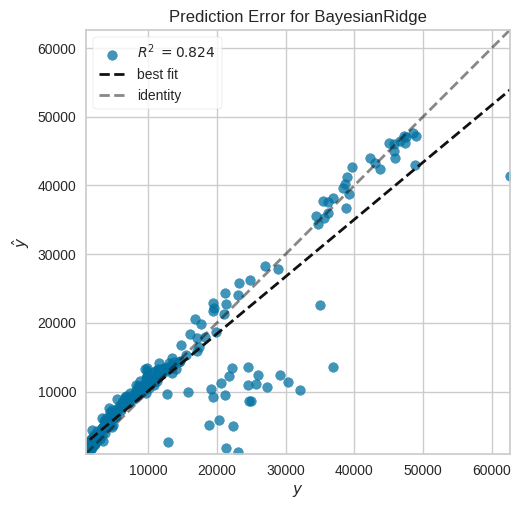

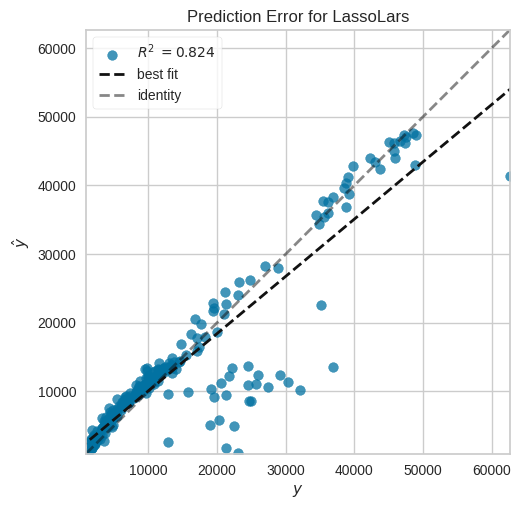

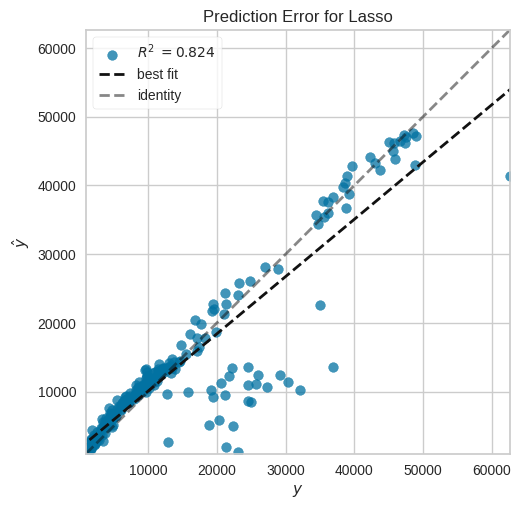

In [ ]:
plot_model(tuned_br, plot = 'error')
plot_model(tuned_llar, plot = 'error')
plot_model(tuned_lasso, plot = 'error')

##### 5.5.2 Curvas de aprendizado

> Curvas de aprendizado providenciam a representação matemática do processo de aprendizado que acontece quando tarefas de repetição ocorrem.

No contexto do _Machine Learning_, mostra o aprendizado do modelo como função do tempo ou de experiências. Trata-se de uma ferramenta diagnóstica para averiguar como o algoritmo evoluiu sua performance sobre o conjunto de treino ou validação.

A curva de aprendizado sobre os dados de treino mostra o quanto o algoritmo está aprendendo a cada iteração. Já para os dados de validação, a curva de aprendizado mostra o quão bem o modelo está generalizando.


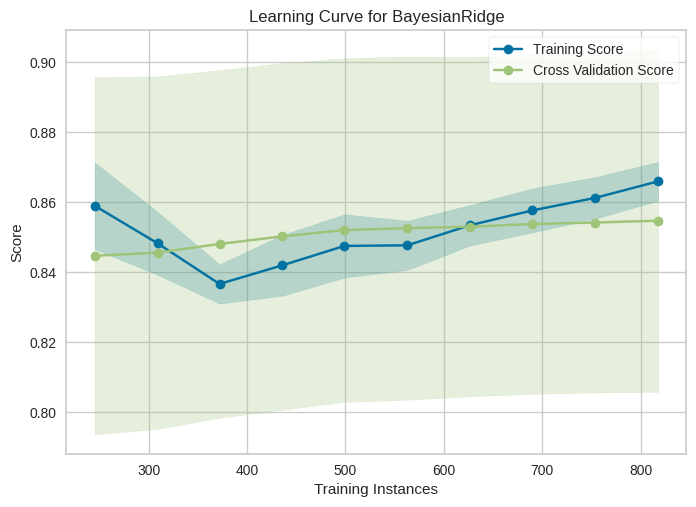

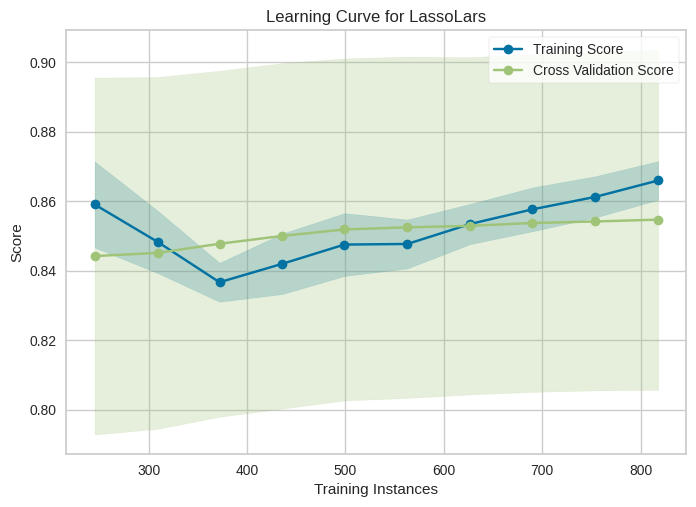

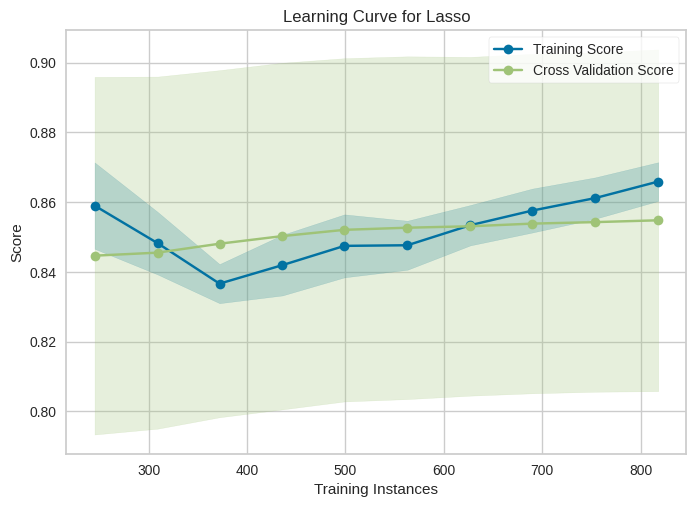

In [ ]:
plot_model(tuned_br, plot = 'learning')
plot_model(tuned_llar, plot = 'learning')
plot_model(tuned_lasso, plot = 'learning')

De modo geral, as três curvas de aprendizado que representam cada modelo são bem parecidas. Elas mostram que o ajuste foi bom, pois espera-se que a curva de treinamento seja maior que a curva de validação ao final das instâncias de treinamento, com um pequeno _gap_ chamado de _gap_ de generalização.

##### 5.5.3 Feature Importances

Os gráficos de _feature importances_ mostram a importância dos atributos para a construção dos modelos de previsão. Eles ordenam as variáveis que foram mais relevantes e que contribuem com maior peso ao se estimar o valor das cobranças, no contexto da previsão de custos para seguros de saúde.

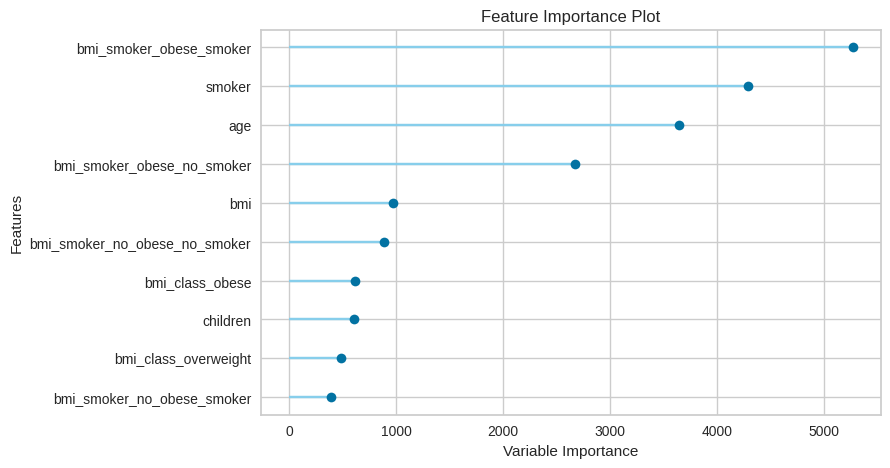

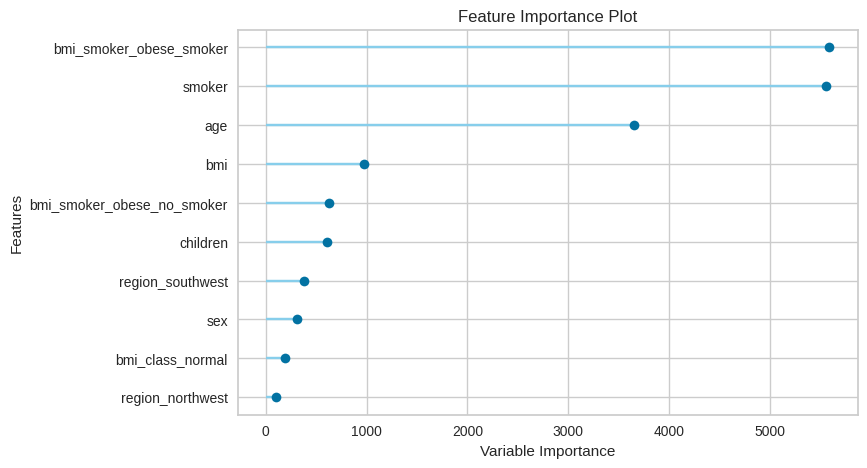

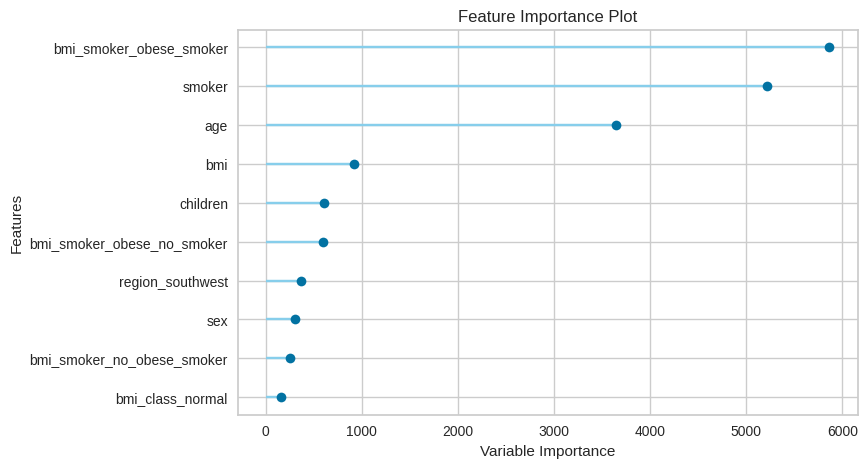

In [ ]:
plot_model(tuned_br, plot = 'feature')
plot_model(tuned_llar, plot = 'feature')
plot_model(tuned_lasso, plot = 'feature')

Todos os modelos ordenaram os atributos aproximadamente da mesma forma e com os mesmos pesos. Note que a muitas das premissas que tomamos durante as etapas de análise exploratória e visualização dos dados foram confirmadas pelo algoritmo de regressão, que julgou como atributos mais informativos o `bmi`, `smoker`, `age` e `bmi_smoker_obese_smoker`.

## 6. Previsões

Antes de finalizar os modelos, iremos realizar previsões com os dados de teste retidos pelo PyCaret, que neste caso corresponde a 20% do conjunto de treino. Deste modo, poderemos comparar com a performance obtida através da média da validação cruzada feita com os dados de treino.

#### 6.1 Bayesian Ridge

In [ ]:
predict_model(tuned_br);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,2893.3938,28994533.4757,5384.6572,0.8239,0.4521,0.2510


#### 6.2 Lasso Least Angle Regression

In [ ]:
predict_model(tuned_llar);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,2889.2097,28985862.5815,5383.8520,0.8239,0.4527,0.2493


#### 6.3 Lasso Regression

In [ ]:
predict_model(tuned_lasso);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2888.1825,28902893.9416,5376.1412,0.8245,0.4496,0.2500


Para os três modelos, vemos uma ligeira piora na performance com relação às métricas de RMSE e R2 obtidas na média da validação cruzada para o conjunto de treino. Porém, a variação está dentro de um intervalo aceitável, visto que é esperado que o treinamento apresente maior performance devido ao maior número de exemplos e mais permutações da validação cruzada.

## 7. Finalizando os modelos

Utilizando a função `finalize_model()`, o PyCaret treina os modelos sobre todos os dados que foram passados durante o `setup`. Isto é, tanto os de treino quanto os de validação, que fazem parte daquele primeiro conjunto de treino que separamos na seção 4.1.

In [ ]:
# Modelo Bayesian Ridge
final_br = finalize_model(tuned_br)
# Modelo Lasso Lars
final_llar = finalize_model(tuned_llar)
# Modelo Lasso
final_lasso = finalize_model(tuned_lasso)

## 8. Previsão em dados novos

Com os modelos finalizados podemos realizar previsões com os dados novos do conjunto de teste. Este representa 15% do total do _dataset_, constituindo 201 entradas nunca antes vistas pelos modelos finalizados. Dessa forma, poderemos ter uma noção mais clara a respeito da perforamance dos modelos e a capacidade de generalização de cada um.

Para realizar as previsões, iremos utilizar a função `predict_model()`. A diferença, desta vez, é que especificaremos que as previsões serão realizadas sobre o conjunto de teste, *test_df*, ao invés do conjunto de *holdout* separado pelo próprio PyCaret no pipeline de criação dos modelos.

- **Bayesian Ridge**

In [ ]:
new_pred_br = predict_model(final_br, data = test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,2279.9280,17304900.9223,4159.9160,0.8780,0.3837,0.2657


In [ ]:
new_pred_br.head()

,age,sex,bmi,children,smoker,region,bmi_class,bmi_smoker,charges,prediction_label
522,51,female,33.915001,0,no,northeast,obese,obese_no_smoker,9866.304688,11756.401909
82,22,male,37.619999,1,yes,southeast,obese,obese_smoker,37165.164062,36896.890037
218,26,female,29.920000,1,no,southeast,obese,obese_no_smoker,3392.976807,4528.391435
1266,55,female,30.500000,0,no,southwest,obese,obese_no_smoker,10704.469727,11245.354950
210,20,male,33.000000,1,no,southwest,obese,obese_no_smoker,1980.069946,2204.221058


- **Lasso Least Angle Regression**

In [ ]:
new_pred_llar = predict_model(final_llar, data = test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,2277.8586,17320796.6112,4161.8261,0.8779,0.3829,0.2637


In [ ]:
new_pred_llar.head()

,age,sex,bmi,children,smoker,region,bmi_class,bmi_smoker,charges,prediction_label
522,51,female,33.915001,0,no,northeast,obese,obese_no_smoker,9866.304688,11756.467125
82,22,male,37.619999,1,yes,southeast,obese,obese_smoker,37165.164062,36927.395060
218,26,female,29.920000,1,no,southeast,obese,obese_no_smoker,3392.976807,4513.756820
1266,55,female,30.500000,0,no,southwest,obese,obese_no_smoker,10704.469727,11252.539592
210,20,male,33.000000,1,no,southwest,obese,obese_no_smoker,1980.069946,2179.517803


- **Lasso Regression**

In [ ]:
new_pred_lasso = predict_model(final_lasso, data = test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2279.0405,17332680.2868,4163.2536,0.8778,0.3838,0.2653


In [ ]:
new_pred_lasso.head()

,age,sex,bmi,children,smoker,region,bmi_class,bmi_smoker,charges,prediction_label
522,51,female,33.915001,0,no,northeast,obese,obese_no_smoker,9866.304688,11744.658145
82,22,male,37.619999,1,yes,southeast,obese,obese_smoker,37165.164062,36929.161559
218,26,female,29.920000,1,no,southeast,obese,obese_no_smoker,3392.976807,4583.168804
1266,55,female,30.500000,0,no,southwest,obese,obese_no_smoker,10704.469727,11300.252444
210,20,male,33.000000,1,no,southwest,obese,obese_no_smoker,1980.069946,2238.682439


Note que os modelos finalizados performaram muito bem com dados novos, com desempenhos que superaram aqueles obtidos durante as etapas de treinamento e validação (a média de validação cruzada foi de aproximadamente R2 = 0,855 para os três modelos).

Assim, obtivemos o seguinte ranking de performance:

| **Modelos**                             | **R2** | **RMSE** |
|-----------------------------------------|:------:|:--------:|
| **Bayesian Ridge (*br*)**                 | 0.8780 | 4159.92  |
| **Lasso Least Angle Regression (*llar*)** | 0.8779 | 4161.83  |
| **Lasso Regression (*lasso*)**            | 0.8778 | 4163.25  |

Interessante notar que todos os modelos têm uma tendência de superestimar ligeiramente o valor do plano de saúde.

## 9. Salvando o modelo

Agora que temos o melhor modelo de regressão para o problema de previsão de custos para seguro de saúde, podemos salvá-lo para ser usado posteriormente em novos dados. Ao utilizar a função `save_model()`, o PyCaret guarda o pipeline que criou o modelo escolhido e realiza novas previsões segundo o conjunto de dados passados ao carregá-lo novamente.

In [ ]:
'''
Salvando o modelo baseado no algoritmo de Bayesian Ridge
sob o nome HICP_Final, em que HICP é a sigla para Health
Insurance Cost Prediction.
'''
save_model(final_br, 'HICP_Final_07_08_2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region',
                                              'bmi_class', 'bmi_smoker'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapp...
                  TransformerWrapper(include=['region', 'bmi_class',
                                              'bmi_smoker'],
                                     transformer=OneHotEncoder(cols=['region',
                                                                     'bmi_class',
                                                                     'bmi_smoker'],
                                      

## Conclusão

Neste projeto, tínhamos o objetivo de prever os custos de seguros de saúde, baseado em dados demográficos e hábitos de vidas dos clientes. Com isso, o objetivo final consistia de construir um modelo de regressão capaz de prever o valor anual que um cliente com características específicas pagaria.

Foram analisadas variáveis que envolvem desde a idade, quantidade de filhos, peso e IMC, até hábito com cigarro. Na análise exploratória e visualização dos dados, conseguimos visualizar tendências e padrões nos dados que mostraram uma forte correlação positiva entre o fato da pessoas ser fumante e pagar mais caro no plano de saúde.

Além disso, vimos também que pessoas obesas e em sobrepeso tendem a ser mais cobradas. Se a pessoa é obesa e fumante, estes dois fatores de risco fazem elevar os custos dos seguros de saúde para o grupo com cobranças mais altas.

Na construção do modelo de previsão, utilizamos o PyCaret para a criação de pipelines de pré-processamento, comparação de modelos, ajuste e otimização de hiperparâmetros. Foram testados diversos modelos de regressão linear baseados na métrica de RMSE, sendo escolhidos três para otimização: **Bayesian Ridge**, **Lasso Least Angle Regression** e **Lasso Regression**.

Na validação cruzada com os modelos básicos, todos obtiveram a mesma performance sobre os dados de treino. Na avaliação com os dados de validação separados pelo PyCaret, os três modelos obtiveram uma performances ligeiramente pior que no treino, mas dentro do intervalo esperado considerando-se as diferenças na quantidade de exemplos e permutação dos dados.

Já o desempenho em dados novos foi muito satisfatória. Os modelos superaram a performance obtida no treinamento, mostrando um bom poder de geralização. Em média, a métrica R2 ficou em 0,8779, mostrando que o modelo é capaz de utilizar bem das variáveis independentes para explicar as variações no alvo, aproximando muito bem o custo do plano de saúde para um novo exemplo. O RMSE ficou com uma média de 4161 para os três modelos.

Dentre os três modelos, o melhor foi o Bayesian Ridge, com R2 de 0.878 e RMSE de 4159. Por ter o melhor poder preditivo, este foi o modelo escolhido para fazer o deployment via PyCaret. O modelo foi salvo e fica disponível para carregamento e utilização em novos dados.

Em suma, modelos de regressão foram testados para a previsão de custos de seguros de saúde, baseados em atributos demográficos e relacionados a hábitos de vida dos clientes. Os modelos foram construídos e otimizados através de um pipeline de _Machine Learning_ integrado no PyCaret. Os modelos resultantes obtiveram ótimas métricas de generalização para novos exemplos, sendo o Bayesian Ridge o melhor dentre os testados.

